## Importing libraries for dats analysis

In [2]:
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#import if you want to read the data directly form the API using pandas_datareader
import pandas_datareader.data as web

# Imports for offline interactive plotting
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

# Use Pandas Web Datareader to download the stocks prices for large Alberta oil producers from Yahoo Finance

In [3]:
start = datetime.datetime(2014, 3, 1)
end = datetime.datetime(2021, 3, 1)

Suncor = web.DataReader("SU", 'yahoo', start, end)
CNRL = web.DataReader("CNQ", 'yahoo', start, end)
Cenovus = web.DataReader("CVE", 'yahoo', start, end)
CrescentPoint = web.DataReader("CPG", 'yahoo', start, end)
Imperial = web.DataReader("IMO", 'yahoo', start, end)

# Download the stocks prices for large US oil producers 

In [7]:
ExxonMobil = web.DataReader("XOM", 'yahoo', start, end)
Chevron = web.DataReader("CVX", 'yahoo', start, end)
ConocoPhillips = web.DataReader("COP", 'yahoo', start, end)
EOGResources = web.DataReader("EOG", 'yahoo', start, end)
OccidentalPetroleum = web.DataReader("OXY", 'yahoo', start, end)

## Take a look at recent stock prices for Suncor and Chevron. Make sure the data sets have been downloaded properly.

In [5]:
Suncor.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,21.139999,19.840000,20.820000,20.930000,12928200.0,20.761913
2021-02-24,21.860001,20.790001,21.150000,21.530001,11814200.0,21.357094
2021-02-25,21.770000,20.629999,21.750000,20.650000,11358800.0,20.484161
2021-02-26,20.320000,19.520000,20.230000,19.860001,10115700.0,19.700506
2021-03-01,20.700001,20.010000,20.469999,20.240000,10492200.0,20.077454


In [6]:
Chevron.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,100.160004,96.800003,99.970001,99.629997,14874000.0,99.629997
2021-02-24,104.040001,99.809998,100.330002,103.309998,16116000.0,103.309998
2021-02-25,104.959999,101.589996,104.900002,102.349998,13219200.0,102.349998
2021-02-26,101.059998,97.610001,100.300003,100.000000,14452300.0,100.000000
2021-03-01,103.800003,101.400002,102.459999,102.050003,10439900.0,102.050003


# Concatinate all datasets into a single dataset 'cop' for canadian oil producers and check the head of the dataset

In [10]:
#stocks list for combined dataset
CAD_stocks = ["SU", "CNQ", "CVE", "CPG", "IMO"]
#concatinating data into Canadian Oil Producers
cop = pd.concat([Suncor, CNRL, Cenovus, CrescentPoint, Imperial], axis=1, keys=CAD_stocks)
cop.head()

SU                                                         \
                 High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2014-03-03  33.570000  32.970001  33.000000  33.060001  2802300.0  26.521166   
2014-03-04  33.299999  33.000000  33.279999  33.099998  2158200.0  26.553257   
2014-03-05  33.270000  32.880001  33.180000  32.939999  2720800.0  26.424902   
2014-03-06  33.250000  32.869999  33.000000  33.240002  2301500.0  26.665569   
2014-03-07  33.500000  33.209999  33.360001  33.290001  2461900.0  26.705679   

                  CNQ                                   ...        CPG  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2014-03-03  37.200001  36.320000  36.439999  36.790001  ...  34.970001   
2014-03-04  37.150002  36.700001  37.080002  36.820000  ...  35.279999   
2014-03-05  37.009998  36.599998  36.849998  36.880001  ...  35.500000   
2014-03-06  37.590000  36.650002  36.980000  37.270000  ...  35.389999   
2014-03-07  37.599998  37.150002  37.259998  37.389999  ...  35.540001   

                                                 IMO                        \
                Close   Volume  Adj Close       High        Low       Open   
Date                                                                         
2014-03-03  35.110001  24800.0  26.850739  45.209999  44.700001  44.740002   
2014-03-04  35.080002  14600.0  26.827763  45.459999  44.970001  45.240002   
2014-03-05  35.189999  50500.0  26.911896  46.099998  45.189999  45.230000   
2014-03-06  35.349998  50400.0  27.034254  46.720001  45.880001  46.310001   
2014-03-07  35.310001  14800.0  27.003677  46.500000  45.430000  46.419998   

                                            
                Close    Volume  Adj Close  
Date                                        
2014-03-03  45.139999  319600.0  39.652714  
2014-03-04  45.349998  340300.0  39.837196  
2014-03-05  46.060001  277000.0  40.460869  
2014-03-06  46.500000  303300.0  40.847393  
2014-03-07  45.689999  295500.0  40.135849  

[5 rows x 30 columns]

In [12]:
#stocks list for combined dataset
USA_stocks = ["XOM", "CVX", "COP", "EOG", "OXY"]
#concatinating data into Canadian Oil Producers
usop = pd.concat([ExxonMobil, Chevron, ConocoPhillips, EOGResources, OccidentalPetroleum], axis=1, keys=USA_stocks)
usop.head()

XOM                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2014-03-03  96.540001  94.830002  95.760002  95.500000  11896700.0  70.200859   
2014-03-04  96.860001  95.870003  96.589996  96.519997  12566100.0  70.950645   
2014-03-05  95.290001  93.400002  95.199997  93.800003  19829600.0  68.951187   
2014-03-06  93.940002  93.269997  93.669998  93.760002  12610400.0  68.921791   
2014-03-07  95.059998  93.989998  94.370003  94.989998  12659100.0  69.825943   

                   CVX                                      ...        EOG  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2014-03-03  116.190002  114.260002  114.790001  114.839996  ...  94.525002   
2014-03-04  116.269997  115.260002  115.889999  115.320000  ...  95.235001   
2014-03-05  115.260002  114.010002  115.080002  114.430000  ...  96.019997   
2014-03-06  115.150002  114.349998  114.709999  114.849998  ...  95.360001   
2014-03-07  115.949997  114.639999  115.070000  115.080002  ...  95.760002   

                                                   OXY                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2014-03-03  94.644997  5608400.0  87.186302  92.807411  91.475700  91.772705   
2014-03-04  95.779999  4265400.0  88.231850  93.573860  92.366699  92.500832   
2014-03-05  95.245003  3900800.0  87.739006  93.650505  92.711601  93.372665   
2014-03-06  95.529999  3450600.0  88.001549  92.500832  91.791862  92.021797   
2014-03-07  94.959999  3917200.0  87.476463  93.324760  92.299637  93.200218   

                                             
                Close     Volume  Adj Close  
Date                                         
2014-03-03  92.021797  3550086.0  68.123238  
2014-03-04  93.142731  3452180.0  68.953056  
2014-03-05  92.788246  3197290.0  68.690643  
2014-03-06  92.232574  3116606.0  68.790680  
2014-03-07  93.056503  3097401.0  69.405205  

[5 rows x 30 columns]

## Provide the column names 'Entity' and 'Stock' for empty lists and make sure change is applied

In [13]:
cop.columns.names
usop.columns.names

FrozenList([None, None])

In [18]:
cop.columns.names = ['Entity','Stock']
cop.head() 

Entity             SU                                                         \
Stock            High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2014-03-03  33.570000  32.970001  33.000000  33.060001  2802300.0  26.521166   
2014-03-04  33.299999  33.000000  33.279999  33.099998  2158200.0  26.553257   
2014-03-05  33.270000  32.880001  33.180000  32.939999  2720800.0  26.424902   
2014-03-06  33.250000  32.869999  33.000000  33.240002  2301500.0  26.665569   
2014-03-07  33.500000  33.209999  33.360001  33.290001  2461900.0  26.705679   

Entity            CNQ                                   ...        CPG  \
Stock            High        Low       Open      Close  ...       Open   
Date                                                    ...              
2014-03-03  37.200001  36.320000  36.439999  36.790001  ...  34.970001   
2014-03-04  37.150002  36.700001  37.080002  36.820000  ...  35.279999   
2014-03-05  37.009998  36.599998  36.849998  36.880001  ...  35.500000   
2014-03-06  37.590000  36.650002  36.980000  37.270000  ...  35.389999   
2014-03-07  37.599998  37.150002  37.259998  37.389999  ...  35.540001   

Entity                                           IMO                        \
Stock           Close   Volume  Adj Close       High        Low       Open   
Date                                                                         
2014-03-03  35.110001  24800.0  26.850739  45.209999  44.700001  44.740002   
2014-03-04  35.080002  14600.0  26.827763  45.459999  44.970001  45.240002   
2014-03-05  35.189999  50500.0  26.911896  46.099998  45.189999  45.230000   
2014-03-06  35.349998  50400.0  27.034254  46.720001  45.880001  46.310001   
2014-03-07  35.310001  14800.0  27.003677  46.500000  45.430000  46.419998   

Entity                                      
Stock           Close    Volume  Adj Close  
Date                                        
2014-03-03  45.139999  319600.0  39.652714  
2014-03-04  45.349998  340300.0  39.837196  
2014-03-05  46.060001  277000.0  40.460869  
2014-03-06  46.500000  303300.0  40.847393  
2014-03-07  45.689999  295500.0  40.135849  

[5 rows x 30 columns]

In [19]:
usop.columns.names = ['Entity','Stock']
usop.head() 

Entity            XOM                                                          \
Stock            High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2014-03-03  96.540001  94.830002  95.760002  95.500000  11896700.0  70.200859   
2014-03-04  96.860001  95.870003  96.589996  96.519997  12566100.0  70.950645   
2014-03-05  95.290001  93.400002  95.199997  93.800003  19829600.0  68.951187   
2014-03-06  93.940002  93.269997  93.669998  93.760002  12610400.0  68.921791   
2014-03-07  95.059998  93.989998  94.370003  94.989998  12659100.0  69.825943   

Entity             CVX                                      ...        EOG  \
Stock             High         Low        Open       Close  ...       Open   
Date                                                        ...              
2014-03-03  116.190002  114.260002  114.790001  114.839996  ...  94.525002   
2014-03-04  116.269997  115.260002  115.889999  115.320000  ...  95.235001   
2014-03-05  115.260002  114.010002  115.080002  114.430000  ...  96.019997   
2014-03-06  115.150002  114.349998  114.709999  114.849998  ...  95.360001   
2014-03-07  115.949997  114.639999  115.070000  115.080002  ...  95.760002   

Entity                                             OXY                        \
Stock           Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2014-03-03  94.644997  5608400.0  87.186302  92.807411  91.475700  91.772705   
2014-03-04  95.779999  4265400.0  88.231850  93.573860  92.366699  92.500832   
2014-03-05  95.245003  3900800.0  87.739006  93.650505  92.711601  93.372665   
2014-03-06  95.529999  3450600.0  88.001549  92.500832  91.791862  92.021797   
2014-03-07  94.959999  3917200.0  87.476463  93.324760  92.299637  93.200218   

Entity                                       
Stock           Close     Volume  Adj Close  
Date                                         
2014-03-03  92.021797  3550086.0  68.123238  
2014-03-04  93.142731  3452180.0  68.953056  
2014-03-05  92.788246  3197290.0  68.690643  
2014-03-06  92.232574  3116606.0  68.790680  
2014-03-07  93.056503  3097401.0  69.405205  

[5 rows x 30 columns]

# Check the min and max of adjusted closing stock prices for given period. This is a finally adjusted price the stocks were traded by the end of the day.

In [22]:
max_CAD_stock = cop.xs(key='Adj Close',axis=1,level='Stock').max()
max_CAD_stock

Entity
SU     38.311535
CNQ    35.857998
CVE    28.492641
CPG    34.751083
IMO    47.569206
dtype: float64

In [144]:
## The highest stock price for the last 7 year period are Suncor and Imperial.

In [24]:
max_US_stock = usop.xs(key='Adj Close',axis=1,level='Stock').max()
max_US_stock

Entity
XOM     77.249367
CVX    115.743240
COP     74.130875
EOG    125.900688
OXY     76.437698
dtype: float64

In [ ]:
## The highest US oil company stock price for the last 7 year period are Chevron and EOG Resources.

In [23]:
min_CAD_stock = cop.xs(key='Close',axis=1,level='Stock').min()
min_CAD_stock

Entity
SU     10.45
CNQ     7.74
CVE     1.60
CPG     0.61
IMO     7.83
dtype: float64

In [146]:
## Crescent Point Energy and Cenovus were hit the most - more then 10 times drop. CNRL and Cenovus recently made significant acquisitions. 

In [25]:
min_US_stock = usop.xs(key='Close',axis=1,level='Stock').min()
min_US_stock

Entity
XOM    31.450001
CVX    54.220001
COP    22.670000
EOG    29.760000
OXY     8.880000
dtype: float64

In [ ]:
## OXY and ConocoPhillips were hit the most among largest US producers 

## Let's visualise the information about min and max prices using bar plots.  

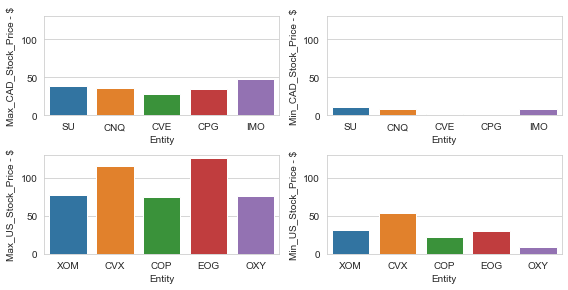

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[8, 4])
axes = axes.flatten()

sns.barplot(max_CAD_stock.index, max_CAD_stock.values, ax=axes[0])
axes.flatten()[0].set_ylim(0,130)
axes.flatten()[0].set_ylabel('Max_CAD_Stock_Price - $')

sns.barplot(min_CAD_stock.index, min_CAD_stock.values, ax=axes[1])
axes.flatten()[1].set_ylim(0,130)
axes.flatten()[1].set_ylabel('Min_CAD_Stock_Price - $')
plt.tight_layout()

sns.barplot(max_US_stock.index, max_US_stock.values, ax=axes[2])
axes.flatten()[2].set_ylim(0,130)
axes.flatten()[2].set_ylabel('Max_US_Stock_Price - $')

sns.barplot(min_US_stock.index, min_US_stock.values, ax=axes[3])
axes.flatten()[3].set_ylim(0,130)
axes.flatten()[3].set_ylabel('Min_US_Stock_Price - $')
plt.tight_layout()

# Let put all the companies together one one plot to visualize Canadian Oil Companies stock prices with time.

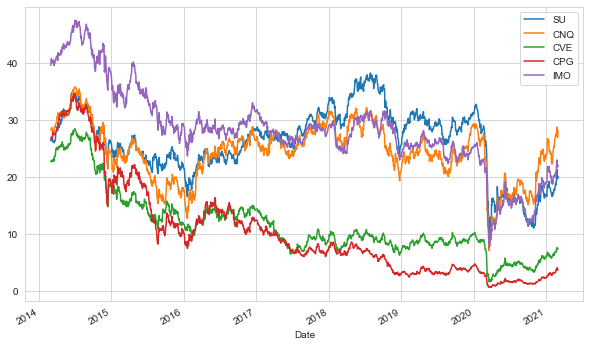

In [45]:
for stock in CAD_stocks:
    cop[stock]['Adj Close'].plot(figsize=(10,6),label=stock)
plt.legend()

# Visualize US Oil Companies stock prices with time.

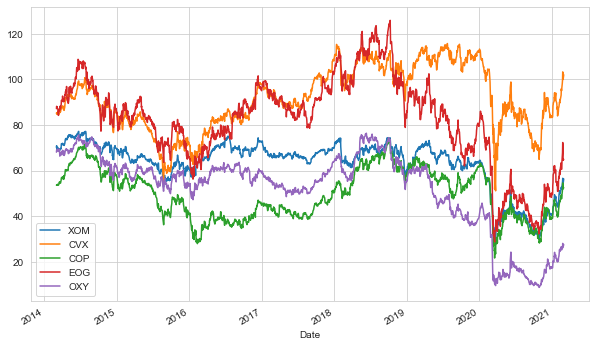

In [47]:
for stock in USA_stocks:
    usop[stock]['Adj Close'].plot(figsize=(10,6),label=stock)
plt.legend()

# Look at the Canadian Oil Companies stock price for the last year when pandemic striked

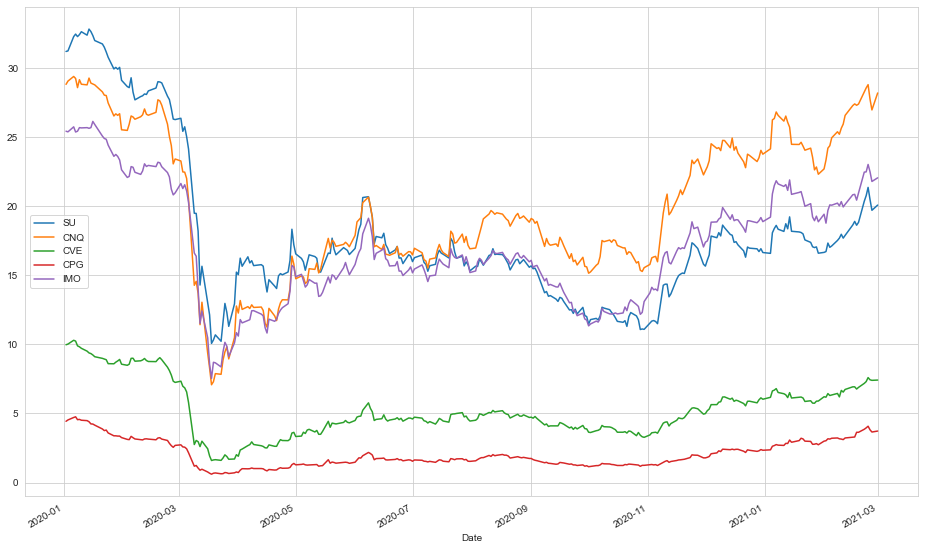

In [48]:
for stock in CAD_stocks:
    cop[stock]['Adj Close'].loc['2020-01-01':'2021-03-01'].plot(figsize=(16,10),label=stock)
plt.legend()

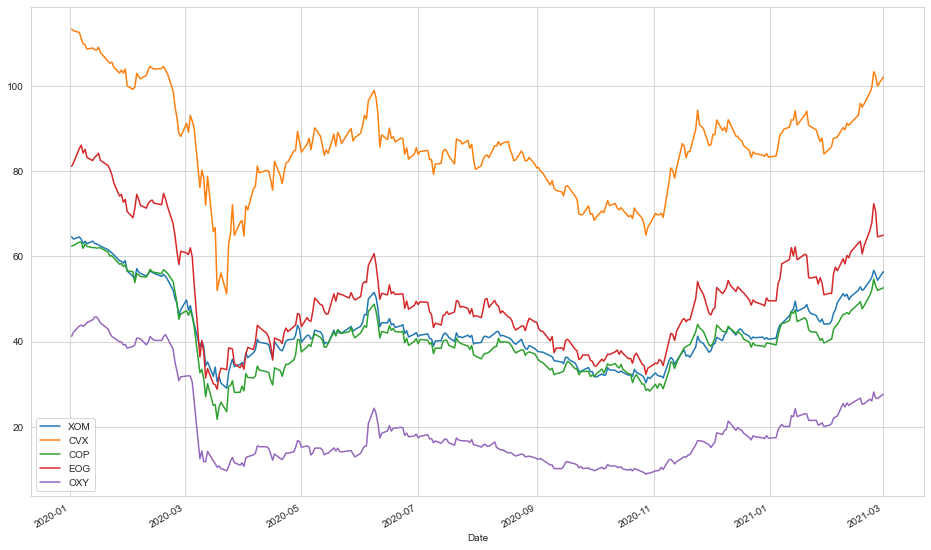

In [49]:
for stock in USA_stocks:
    usop[stock]['Adj Close'].loc['2020-01-01':'2021-03-01'].plot(figsize=(16,10),label=stock)
plt.legend()

## Visualizing stock prices vs. time using interactive data plotting(iplot). The significant price drop occured between mid 2014 and end of 2016. It directly correlates with overall oil price drop started in 2014. 

In [50]:
cop.xs(key='Adj Close',axis=1,level='Stock').iplot()

## We want to calculate Return - the expected value, of the probability distribution of investment returns

In [52]:
CAD_returns = pd.DataFrame()
for stock in CAD_stocks:
    returns[stock+' Return'] = cop[stock]['Adj Close'].pct_change()
returns.head()

,SU Return,CNQ Return,CVE Return,CPG Return,IMO Return
Date,,,,,
2014-03-03,NaN,NaN,NaN,NaN,NaN
2014-03-04,0.001210,0.000815,-0.003772,-0.000856,0.004652
2014-03-05,-0.004834,0.001630,-0.000379,0.003136,0.015656
2014-03-06,0.009108,0.010575,0.006818,0.004547,0.009553
2014-03-07,0.001504,0.003220,-0.001129,-0.001131,-0.017420


In [54]:
US_returns = pd.DataFrame()
for stock in USA_stocks:
    returns[stock+' Return'] = usop[stock]['Adj Close'].pct_change()
returns.head()

,SU Return,CNQ Return,CVE Return,CPG Return,IMO Return,XOM Return,CVX Return,COP Return,EOG Return,OXY Return
Date,,,,,,,,,,
2014-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-04,0.001210,0.000815,-0.003772,-0.000856,0.004652,0.010681,0.004180,0.002866,0.011992,0.012181
2014-03-05,-0.004834,0.001630,-0.000379,0.003136,0.015656,-0.028181,-0.007718,-0.003007,-0.005586,-0.003806
2014-03-06,0.009108,0.010575,0.006818,0.004547,0.009553,-0.000426,0.003670,0.001357,0.002992,0.001456
2014-03-07,0.001504,0.003220,-0.001129,-0.001131,-0.017420,0.013119,0.002003,0.001807,-0.005967,0.008933


In [96]:
## Let's visualize our returns using pair plot

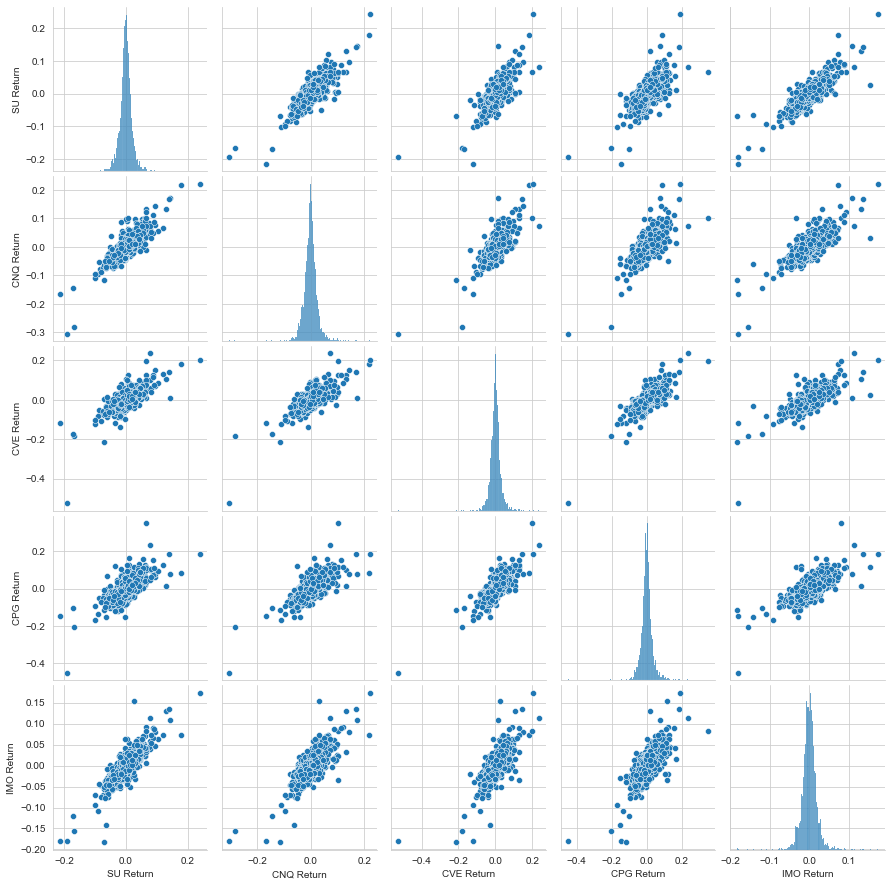

In [97]:
import seaborn as sns
sns.pairplot(returns[1:]) # avoiding NaN row

## I would like to look at best gain day and worst drop day using idxmax and idxmin.

In [57]:
print(returns.idxmax(), returns.idxmin())

SU Return    2020-11-09
CNQ Return   2020-11-09
CVE Return   2020-04-02
CPG Return   2020-05-18
IMO Return   2020-11-09
XOM Return   2020-03-24
CVX Return   2020-03-24
COP Return   2020-03-24
EOG Return   2020-11-09
OXY Return   2020-06-05
dtype: datetime64[ns] SU Return    2020-03-12
CNQ Return   2020-03-09
CVE Return   2020-03-09
CPG Return   2020-03-09
IMO Return   2020-03-17
XOM Return   2020-03-09
CVX Return   2020-03-18
COP Return   2020-03-09
EOG Return   2020-03-09
OXY Return   2020-03-09
dtype: datetime64[ns]


## I want to look at standard deviation to identify the riskiest stock in 2014

In [60]:
returns.loc['2015-01-01':'2015-12-31'].std() 
#Exxon and Oxidental had the lowest return in 2015

SU Return     0.019471
CNQ Return    0.025686
CVE Return    0.026003
CPG Return    0.033644
IMO Return    0.019299
XOM Return    0.014177
CVX Return    0.017262
COP Return    0.019767
EOG Return    0.020941
OXY Return    0.016374
dtype: float64

## What is the riskiest stock in 2020? 

In [59]:
returns.loc['2020-01-01':'2020-12-31'].std() 
## It is Exxon and Cenovus

SU Return     0.046937
CNQ Return    0.051858
CVE Return    0.064427
CPG Return    0.067765
IMO Return    0.044142
XOM Return    0.033284
CVX Return    0.038443
COP Return    0.045671
EOG Return    0.047020
OXY Return    0.068950
dtype: float64

## Create distribution plots to show return on stocks in 2020. 

<AxesSubplot:xlabel='IMO Return', ylabel='Density'>

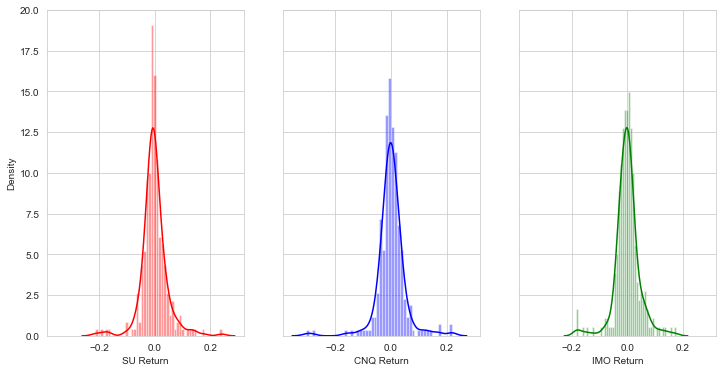

In [61]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(returns.loc['2020-01-01':'2020-12-31']['SU Return'],
             color='red', bins=50, ax=axes[0])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['CNQ Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['IMO Return'], 
             color='green', bins=50, ax=axes[2])


<AxesSubplot:xlabel='EOG Return', ylabel='Density'>

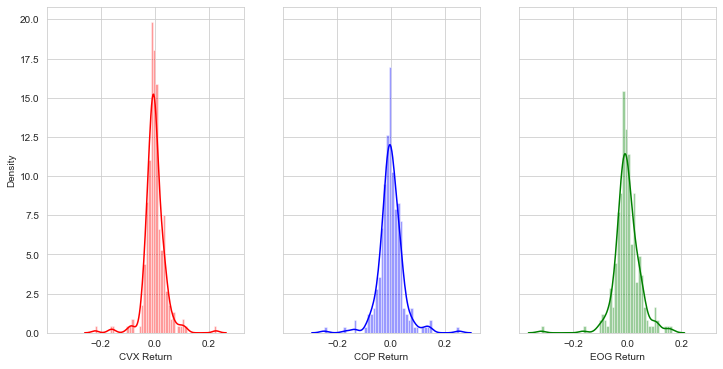

In [62]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(returns.loc['2020-01-01':'2020-12-31']['CVX Return'], 
             color='red', bins=50, ax=axes[0])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['COP Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['EOG Return'], 
             color='green', bins=50, ax=axes[2])

## The other way to look at stock price correlation is to create a heatmap. 

<AxesSubplot:xlabel='Entity', ylabel='Entity'>

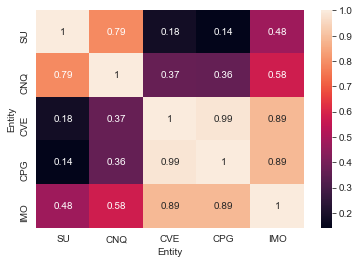

In [103]:
sns.heatmap(cop.xs(key='Adj Close',axis=1,level='Stock').corr(),annot=True)

## Let's look at moving average for CPG and CVE - the lowest stock prices as of 2020.

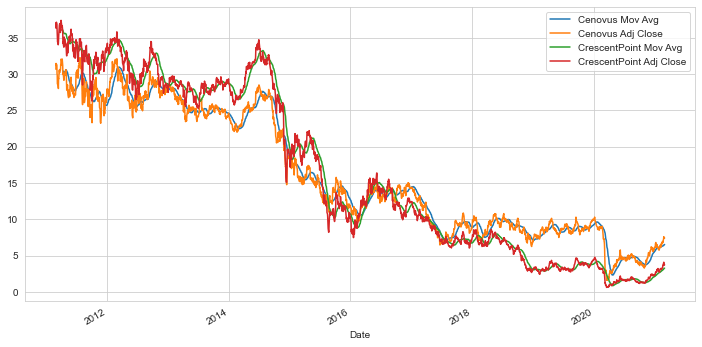

In [104]:
plt.figure(figsize=(12,6))
Cenovus['Adj Close'].loc['2011-01-01':'2021-03-01'].rolling(window=30).mean().plot(
    label='Cenovus Mov Avg')
Cenovus['Adj Close'].loc['2011-01-01':'2021-03-01'].plot(
    label='Cenovus Adj Close')
CrescentPoint['Adj Close'].loc['2011-01-01':'2021-03-01'].rolling(window=30).mean().plot(
    label='CrescentPoint Mov Avg')
CrescentPoint['Adj Close'].loc['2011-01-01':'2021-03-01'].plot(
    label='CrescentPoint Adj Close')

plt.legend()

## Create a candle plot for Cenovus stocks at year 2020. This financial chart takes a dataset that contains open, high, low and close values for specific time period 

In [105]:
Cenovus[['Open', 'High', 'Low', 'Close']].loc['2019-12-31':'2021-01-01'].iplot(kind='candle')


In [106]:
Cenovus.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-03-01,39.160000,38.270000,39.049999,38.689999,2019400.0,30.683428
2011-03-02,39.840000,38.799999,38.799999,39.700001,2222700.0,31.484413
2011-03-03,39.790001,38.860001,39.560001,39.320000,1329500.0,31.183054
2011-03-04,39.830002,39.240002,39.680000,39.580002,1514200.0,31.389257
2011-03-07,40.060001,39.119999,39.869999,39.369999,1456900.0,31.222706


In [107]:
Cenovus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-03-01 to 2021-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 217.6 KB


In [75]:
Cenovus_fltr = web.DataReader("CVE", 'yahoo', start, end)
dt_range = pd.date_range(start="2020-01-01", end="2021-03-01")
Cenovus_fltr = Cenovus_fltr[Cenovus_fltr.index.isin(dt_range)]
Cenovus_fltr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2020-01-02 to 2021-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       292 non-null    float64
 1   Low        292 non-null    float64
 2   Open       292 non-null    float64
 3   Close      292 non-null    float64
 4   Volume     292 non-null    float64
 5   Adj Close  292 non-null    float64
dtypes: float64(6)
memory usage: 16.0 KB


In [76]:
Suncor_fltr = web.DataReader("SU", 'yahoo', start, end)
Suncor_fltr = Suncor_fltr[Suncor_fltr.index.isin(dt_range)]

In [79]:
ExxonMobil_fltr = web.DataReader("XOM", 'yahoo', start, end)
ExxonMobil_fltr = ExxonMobil_fltr[ExxonMobil_fltr.index.isin(dt_range)]

In [77]:
fig = go.Figure(data=[go.Candlestick(x=Suncor_fltr.index,
                open=Suncor_fltr['Open'],
                high=Suncor_fltr['High'],
                low=Suncor_fltr['Low'],
                close=Suncor_fltr['Close'])])
                      

fig.update_layout(
    title='The Pandemic Recession',
    yaxis_title='Suncor Stock',
    shapes = [dict(
        x0='2020-03-01', x1='2020-03-01', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-03-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Pandemic Starts')]
)

fig.show()

In [80]:
fig = go.Figure(data=[go.Candlestick(x=ExxonMobil_fltr.index,
                open=ExxonMobil_fltr['Open'],
                high=ExxonMobil_fltr['High'],
                low=ExxonMobil_fltr['Low'],
                close=ExxonMobil_fltr['Close'])])
                      

fig.update_layout(
    title='The Pandemic Recession',
    yaxis_title='ExxonMobil Stock',
    shapes = [dict(
        x0='2020-03-01', x1='2020-03-01', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-03-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Pandemic Starts')]
)

fig.show()

## Create a Simple Moving Averages (SMA) plot of Cenovus for the year 2020, passing three periods[10,30,50]

In [123]:
Cenovus['Adj Close'].loc['2020-01-01':'2020-12-31'].ta_plot(
    study='sma',periods=[10,30,50],title='Simple Moving Averages')

## Look at Bollinger statistical chart characterizing the stock prices and volatility over time for Cenovus year 2020

In [124]:
Cenovus['Adj Close'].loc['2020-01-01':'2020-12-31'].ta_plot(study='boll')

## Let's call for closing stock price for all the companies once again

In [64]:
cop = web.DataReader(CAD_stocks,'yahoo',start=start,end=end)['Adj Close']
cop.head()

Symbols,SU,CNQ,CVE,CPG,IMO
Date,,,,,
2014-03-03,26.521166,28.238750,22.794029,26.850739,39.652714
2014-03-04,26.553257,28.261776,22.708052,26.827763,39.837196
2014-03-05,26.424902,28.307842,22.699451,26.911896,40.460869
2014-03-06,26.665569,28.607185,22.854223,27.034254,40.847393
2014-03-07,26.705679,28.699297,22.828424,27.003677,40.135849


In [78]:
usop = web.DataReader(USA_stocks,'yahoo',start=start,end=end)['Adj Close']
usop.head()

Symbols,XOM,CVX,COP,EOG,OXY
Date,,,,,
2014-03-03,70.200859,85.083763,53.645279,87.186302,68.123238
2014-03-04,70.950645,85.439377,53.799000,88.231850,68.953056
2014-03-05,68.951187,84.779991,53.637199,87.739006,68.690643
2014-03-06,68.921791,85.091133,53.710007,88.001549,68.790680
2014-03-07,69.825943,85.261551,53.807087,87.476463,69.405205


## How do the returns corelate for competitors - Cenovus and Crescent Point?

In [67]:
#Canadian companies stock correlation
cop_comp = cop.pct_change()
corr_cop = cop_comp.corr()
#American companies stock correlation
usop_comp = usop.pct_change()
corr_usop = usop_comp.corr()

Text(0, 0.5, 'Returns CPG')

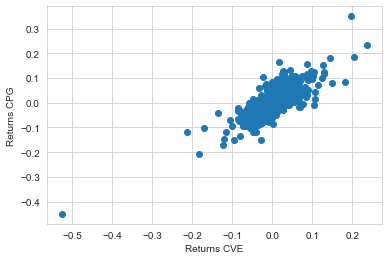

In [68]:
plt.scatter(cop_comp.CVE,cop_comp.CPG)
plt.xlabel('Returns CVE')
plt.ylabel('Returns CPG')
## We can see some positive correlations - the higher CVE, the higher CPG

Text(0, 0.5, 'Returns EOG')

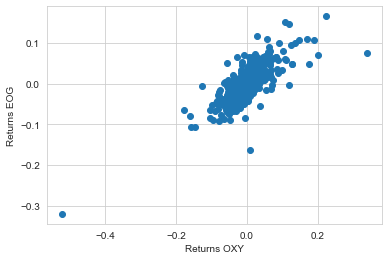

In [73]:
plt.scatter(usop_comp.OXY,usop_comp.EOG)
plt.xlabel('Returns OXY')
plt.ylabel('Returns EOG')
## The higher OXY, the higher EOG

## Another way to look at the returns for Canadian CVE and CPG

Text(0, 0.5, 'CrescentPoint Returns')

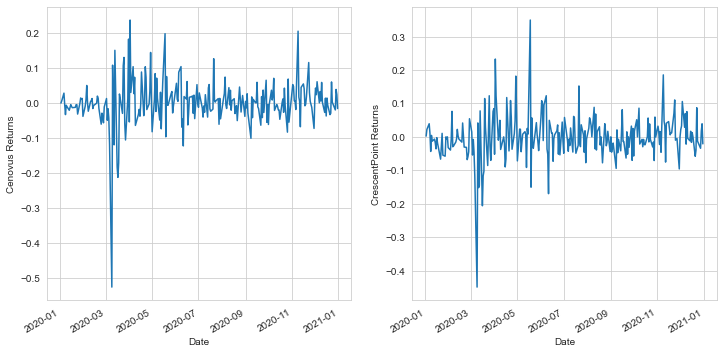

In [69]:
CVE_ret = Cenovus['Adj Close'] / Cenovus['Adj Close'].shift(1) - 1
CPG_ret = CrescentPoint['Adj Close'] / CrescentPoint['Adj Close'].shift(1) - 1


fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

CVE_ret.loc['2020-01-01':'2021-01-01'].plot(figsize=(12,6), label='return', ax=axes[0])
axes[0].set_ylabel('Cenovus Returns')
CPG_ret.loc['2020-01-01':'2021-01-01'].plot(figsize=(12,6), label='return', ax=axes[1])
axes[1].set_ylabel('CrescentPoint Returns')
#plt.tight_layout()

## At the end I would like to look at the stocks with high and low risks

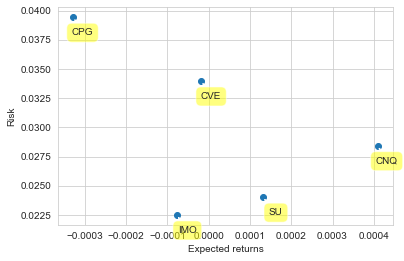

In [70]:
plt.scatter(cop_comp.mean(), cop_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(cop_comp.columns, cop_comp.mean(), cop_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
#Canadian Imperial and Suncor have a stocks with lower risks

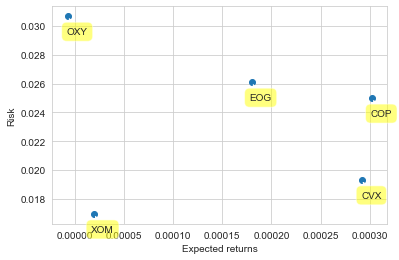

In [71]:
plt.scatter(usop_comp.mean(), usop_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(usop_comp.columns, usop_comp.mean(), usop_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
#American Exxon and Chevron have a stocks with lower risks